In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

import scanpy as sc

from sciso.plot import *

Set plot style

In [2]:
set_nature_style()

## Panel a

### Set paths

In [3]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"
bulk_data_path = data_dir / "ms4022 uptake.csv"

# Output
plots_path = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") / "figure_images" / "fig_04"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [4]:
adata = sc.read_h5ad(adata_path)

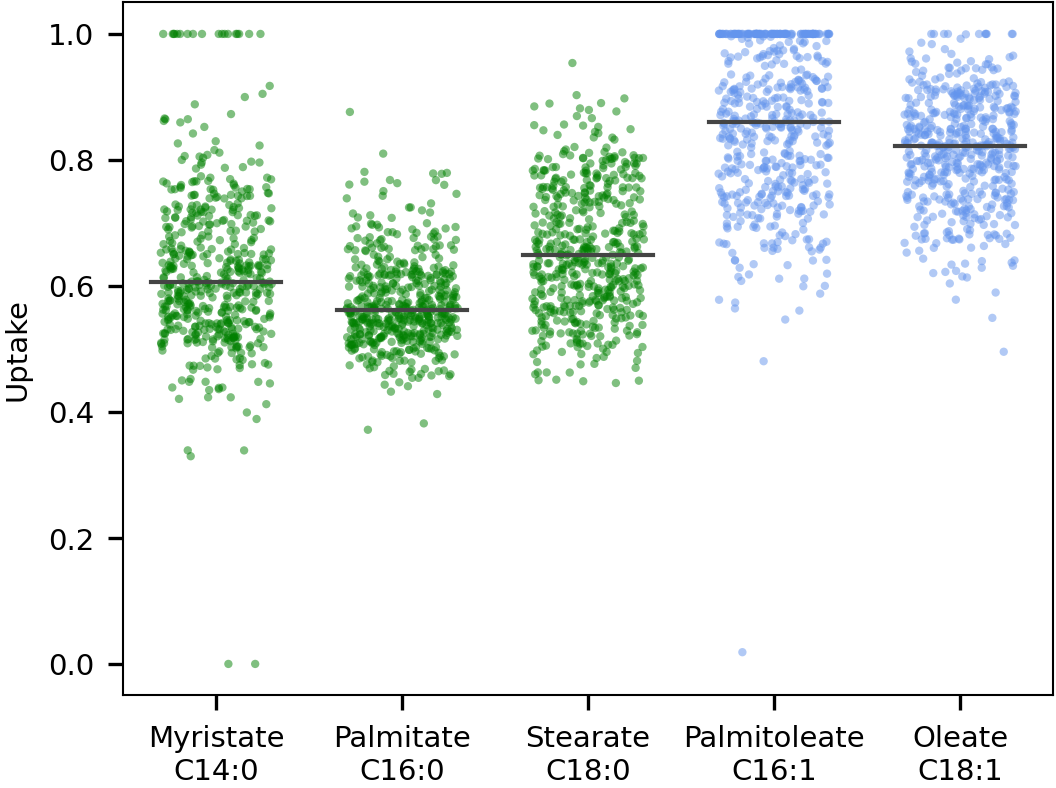

In [5]:
plt.figure(figsize=(4, 3))
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & ((adata.obs.condition == "Wildtype"))].obs

df_uptake = df[['C14H28O2-H_uptake', 'C16H32O2-H_uptake', 'C18H36O2-H_uptake', 'C16H30O2-H_uptake', 'C18H34O2-H_uptake']]
fa_names = {'C14H28O2-H_uptake': "Myristate\nC14:0", 'C16H32O2-H_uptake': "Palmitate\nC16:0", 'C18H36O2-H_uptake': "Stearate\nC18:0", 'C16H30O2-H_uptake': "Palmitoleate\nC16:1", 'C18H34O2-H_uptake': "Oleate\nC18:1"}
df_uptake = df_uptake.rename(columns=fa_names)

ax = sns.stripplot(data=df_uptake, jitter=0.3, alpha=0.5, s=2, palette=["green", "green", "green", "cornflowerblue", "cornflowerblue"])

sns.boxplot(data=df_uptake, width=0.7, showmeans=False,
        meanline=False,
        meanprops={'color': 'k', 'ls': '-', 'lw': 2},
        medianprops={'visible': True, "lw": 1},
        whiskerprops={'visible': False},
        zorder=10,
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax)
ax.set_ylabel("Uptake")


plt.savefig(plots_path / "panel_a_sc.png")
plt.savefig(plots_path / "panel_a_sc.svg")

### Bulk data

In [6]:
bulk_data = pd.read_csv(bulk_data_path)

/tmp/ipykernel_29100/1868064.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=bulk_data, x="fa", y="uptake", jitter=0.4, alpha=1, s=7, palette=["green", "green", "green", "cornflowerblue", "cornflowerblue"])


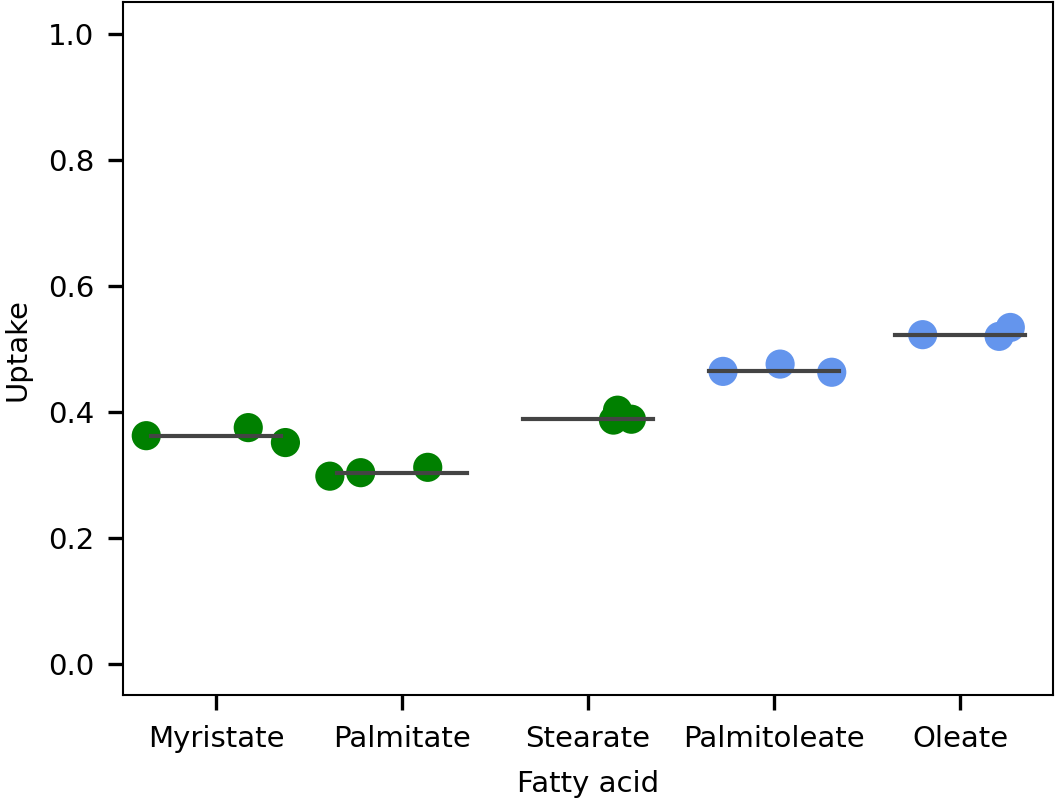

In [7]:
plt.figure(figsize=(4, 3))

ax = sns.stripplot(data=bulk_data, x="fa", y="uptake", jitter=0.4, alpha=1, s=7, palette=["green", "green", "green", "cornflowerblue", "cornflowerblue"])

sns.boxplot(data=bulk_data, x="fa", y="uptake", width=0.7, showmeans=False,
        meanline=False,
        meanprops={'color': 'k', 'ls': '-', 'lw': 2},
        medianprops={'visible': True, "lw": 1},
        whiskerprops={'visible': False},
        zorder=10,
        showfliers=False,
        showbox=False,
        showcaps=False,
        ax=ax)

ax.set_ylabel("Uptake")
ax.set_xlabel("Fatty acid")
ax.set_ylim((-0.05, 1.05))

plt.savefig(plots_path / "panel_a_bulk.png")
plt.savefig(plots_path / "panel_a_bulk.svg")

## Panel b

### Set paths

In [8]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"

# Output
plots_path = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") / "figure_images" / "fig_04"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [9]:
adata = sc.read_h5ad(adata_path)

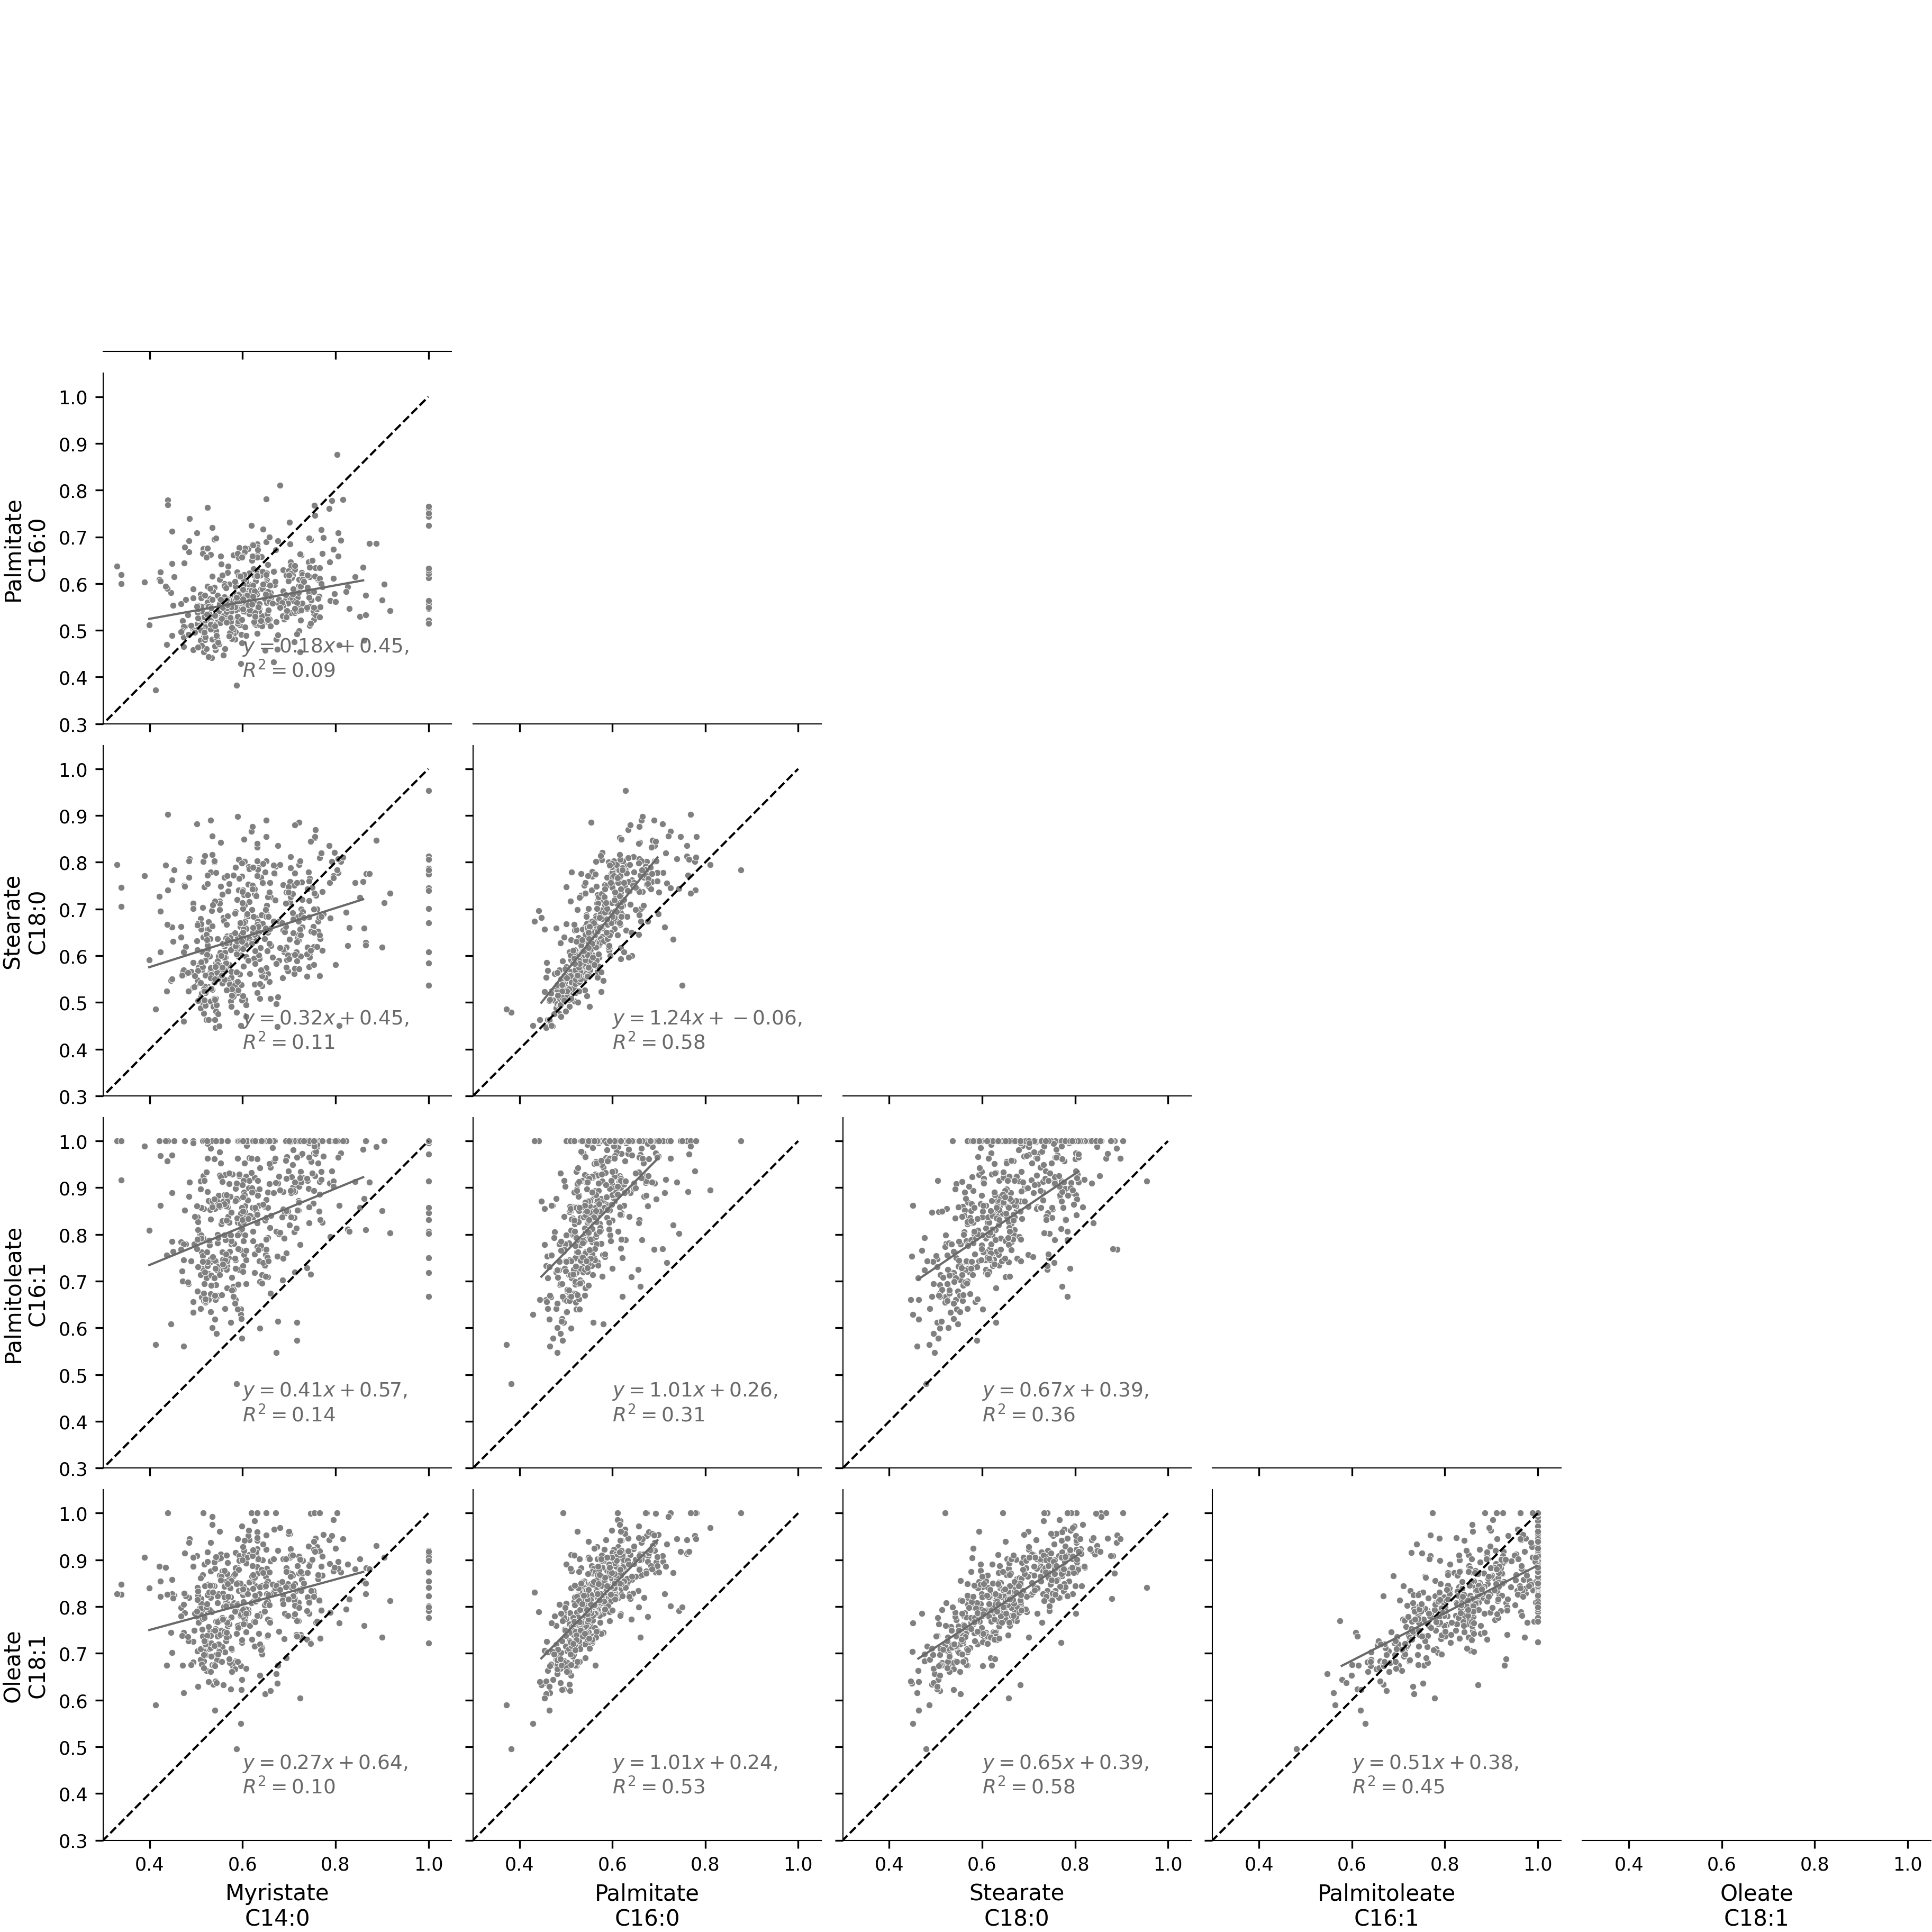

In [10]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & ((adata.obs.condition == "Wildtype"))].obs

df_uptake = df[['C14H28O2-H_uptake', 'C16H32O2-H_uptake', 'C18H36O2-H_uptake', 'C16H30O2-H_uptake', 'C18H34O2-H_uptake']]
fa_names = {'C14H28O2-H_uptake': "Myristate\nC14:0", 'C16H32O2-H_uptake': "Palmitate\nC16:0", 'C18H36O2-H_uptake': "Stearate\nC18:0", 'C16H30O2-H_uptake': "Palmitoleate\nC16:1", 'C18H34O2-H_uptake': "Oleate\nC18:1"}
df_uptake = df_uptake.rename(columns=fa_names)

plt.rcParams.update({'axes.labelsize': 'x-large'})
plt.rcParams.update({'xtick.labelsize': 'large'})
plt.rcParams.update({'ytick.labelsize': 'large'})
g = sns.pairplot(df_uptake, corner=True, plot_kws={"color": "grey"})
g.set(xlim=(0, 1), ylim=(0, 1))

def plot_unity(xdata, ydata, **kwargs):
    mn = 0
    mx = 1
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)
    
def plot_regr(xdata, ydata, **kwargs):
    regr = linear_model.LinearRegression(positive=True)
    xdata = xdata.to_numpy()
    ydata = ydata.to_numpy()
    y = ydata[(xdata > np.quantile(xdata, 0.01)) & (xdata < np.quantile(xdata, 0.95))].reshape(-1, 1)
    x = xdata[(xdata > np.quantile(xdata, 0.01)) & (xdata < np.quantile(xdata, 0.95))].reshape(-1, 1)
    
    
    x = x[(y > np.quantile(y, 0.01)) & (y < np.quantile(y, 0.95))].reshape(-1, 1)
    y = y[(y > np.quantile(y, 0.01)) & (y < np.quantile(y, 0.95))].reshape(-1, 1)
    regr.fit(x, y)
    x_plot = np.linspace(x.min(), x.max(), 10).reshape(-1, 1)
    line_equation = fr"$y = {regr.coef_[0][0]:.2f} x + {regr.intercept_[0]:.2f},$" + "\n" + fr"$R^2 = {regr.score(x, y):.2f}$"
    plt.gca().plot(x_plot, regr.predict(x_plot), label=line_equation, c="dimgrey")
    plt.gca().text(0.6, 0.4, line_equation, c="dimgrey", fontsize=9)

g.set(ylim=(0.3, 1.05))
g.set(xlim=(0.3, 1.05))
    
g.map_offdiag(plot_unity)
g.map_offdiag(plot_regr)

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

g.map_diag(hide_current_axis)

plt.savefig(plots_path / "panel_b.png")
plt.savefig(plots_path / "panel_b.svg")

## Panel d and e

### Set paths

In [11]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"
spacem_dir = data_dir / "slide1" / "spacem_data" / "W1"

# Output
plots_path = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") / "figure_images" / "fig_04"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [12]:
adata = sc.read_h5ad(adata_path)
adata_am = sc.read_h5ad(adata_am_path)

In [13]:
from sciso.parse_spacem_dir import add_spacem_images
from sciso.spatial_plot import *
import re
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


ds_name, cell_masks, cropped_premaldi, cropped_postmaldi, am_masks, overlap_masks = add_spacem_images(spacem_dir)
print(ds_name)
match = re.match(r"S(\d)W(\d)", ds_name)
slide = int(match.group(1))
well = int(match.group(2))
print(f"Slide {slide} well {well}")


cell_contours = segm_masks_to_contours(cell_masks)
adata_SW = adata[(adata.obs.slide == slide) & (adata.obs.well == well)]
adata_am_SW = adata_am[(adata_am.obs.slide == slide) & (adata_am.obs.well == well)]

adata_SW.obs['gfp_class_int'] = adata_SW.obs['gfp_class'].astype(int)
mapped_cells_gfp_class = map_obs_feature_to_masks(cell_contours, adata_SW, 'gfp_class_int')

S1W1
Slide 1 well 1


/tmp/ipykernel_29100/951597703.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_SW.obs['gfp_class_int'] = adata_SW.obs['gfp_class'].astype(int)
/media/buglakova/Extreme SSD/isotope_tracing_backup/code/13C-SpaceM/sciso/spatial_plot.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_scaled[feature_scaled < 0] = 0
/media/buglakova/Extreme SSD/isotope_tracing_backup/code/13C-SpaceM/sciso/spatial_plot.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_scaled[feature_scaled > 1] = 1


In [14]:
def bbox_2D(img, margin=0):
    r = np.any(img, axis=1)
    c = np.any(img, axis=0)

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]

    return max(rmin - margin, 0), min(rmax + margin, img.shape[0]), max(cmin - margin, 0), min(cmax + margin, img.shape[1])



am_masks_squares = am_masks.copy()

for idx in np.unique(am_masks)[1:]:
    
    xmin, xmax, ymin, ymax = bbox_2D(am_masks == idx, margin=1) 
    am_masks_squares[xmin:xmax, ymin:ymax] = idx

In [15]:
ion_name = "C16H32O2-H"
mapped_ams_ion = map_ion_feature_to_masks(am_masks_squares, adata_am_SW, ion_name, int_threshold=1000)

count nonzero 9996
count nonzero 5236


In [16]:
print(mapped_ams_ion.min(), mapped_ams_ion.max())

0.0 0.9360338360409569


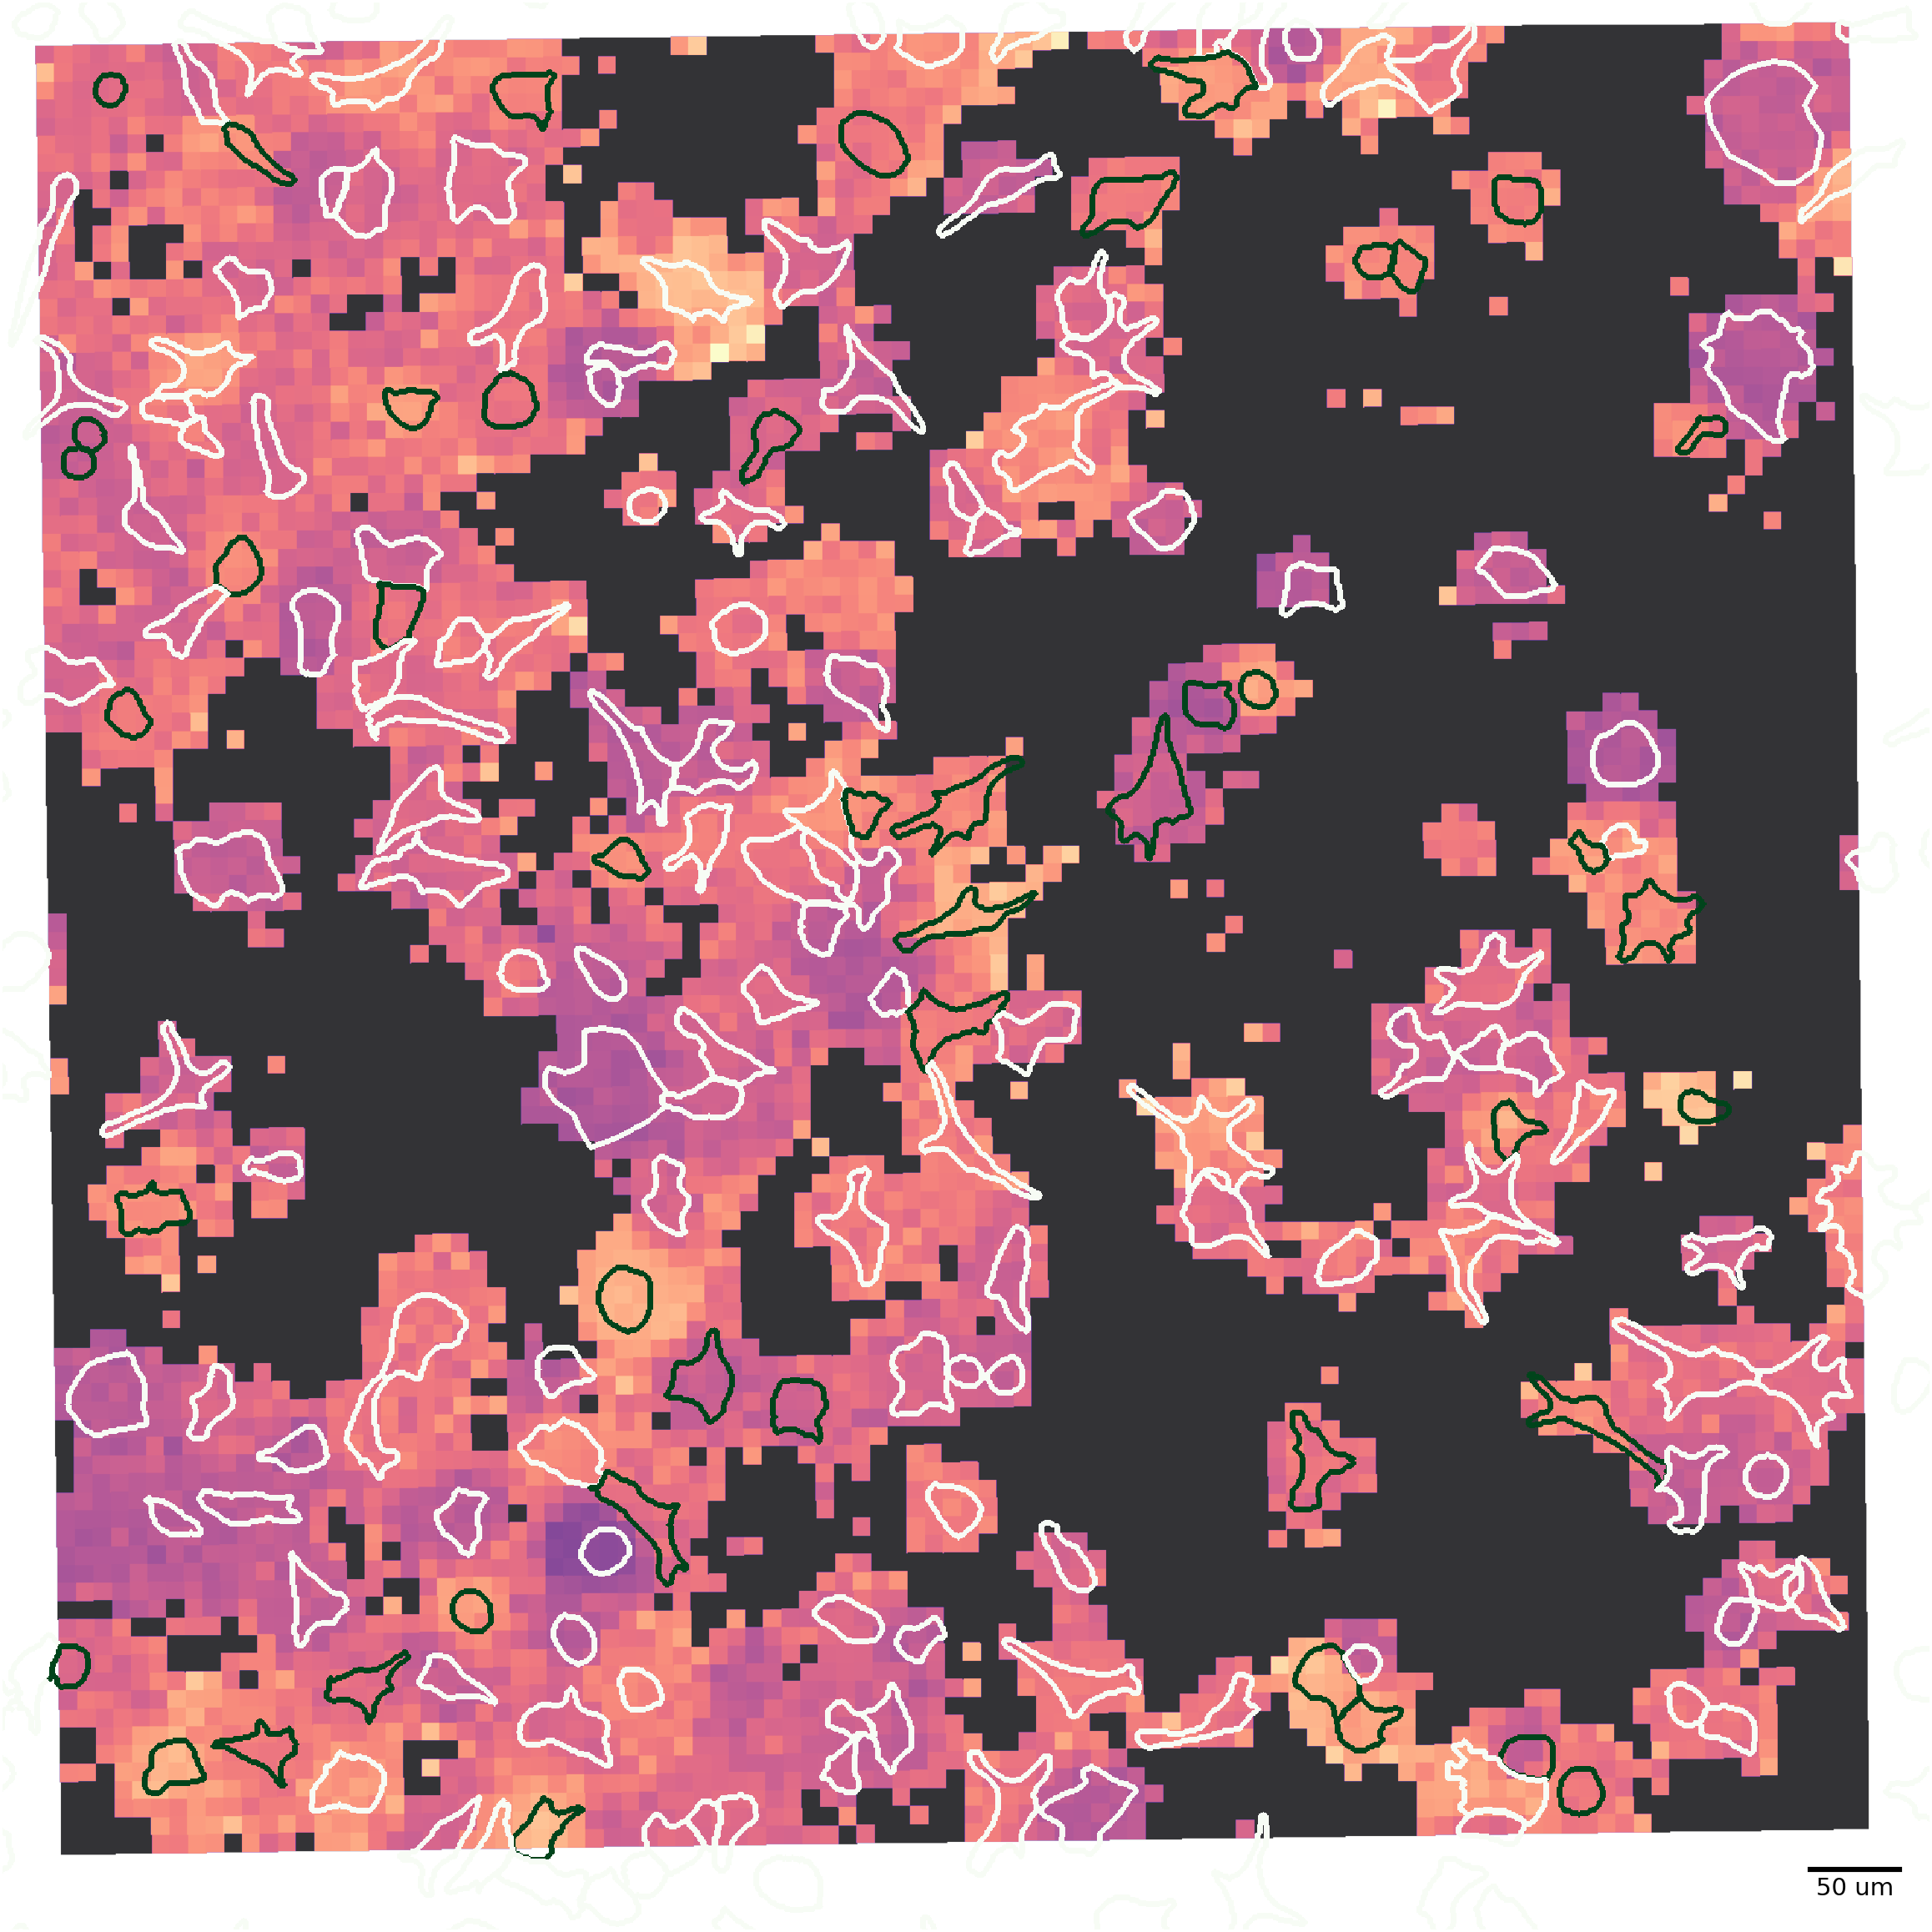

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
roi = np.s_[250:1900, 250:1900]


# plt.imshow(mapped_cells_p[roi], alpha=0.5 * (mapped_cells_p[roi] > 0).astype(float), interpolation="nearest", cmap="magma")

plt.imshow(mapped_ams_ion[roi], alpha=0.8 * (am_masks_squares[roi]>0).astype(float))
plt.imshow(mapped_cells_gfp_class[roi], alpha=(cell_contours[roi] > 0).astype(float), interpolation="nearest", cmap="Greens")
# plt.imshow(mapped_cells_gfp_class[roi], alpha=(mapped_cells_gfp[roi] > 0).astype(float), interpolation="nearest", cmap="Greens")

scalebar = AnchoredSizeBar(ax.transData,
                           78, '50 um', 'lower right', 
                           pad=0.2,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           borderpad=1
                           )

ax.add_artist(scalebar)


plt.axis("off")
plt.savefig(plots_path / "panel_d.png")
plt.savefig(plots_path / "panel_d.svg")
plt.show()

In [18]:
ion_name = "C18H34O2-H"
mapped_ams_ion = map_ion_feature_to_masks(am_masks_squares, adata_am_SW, ion_name, int_threshold=1000)

count nonzero 8907
count nonzero 3999


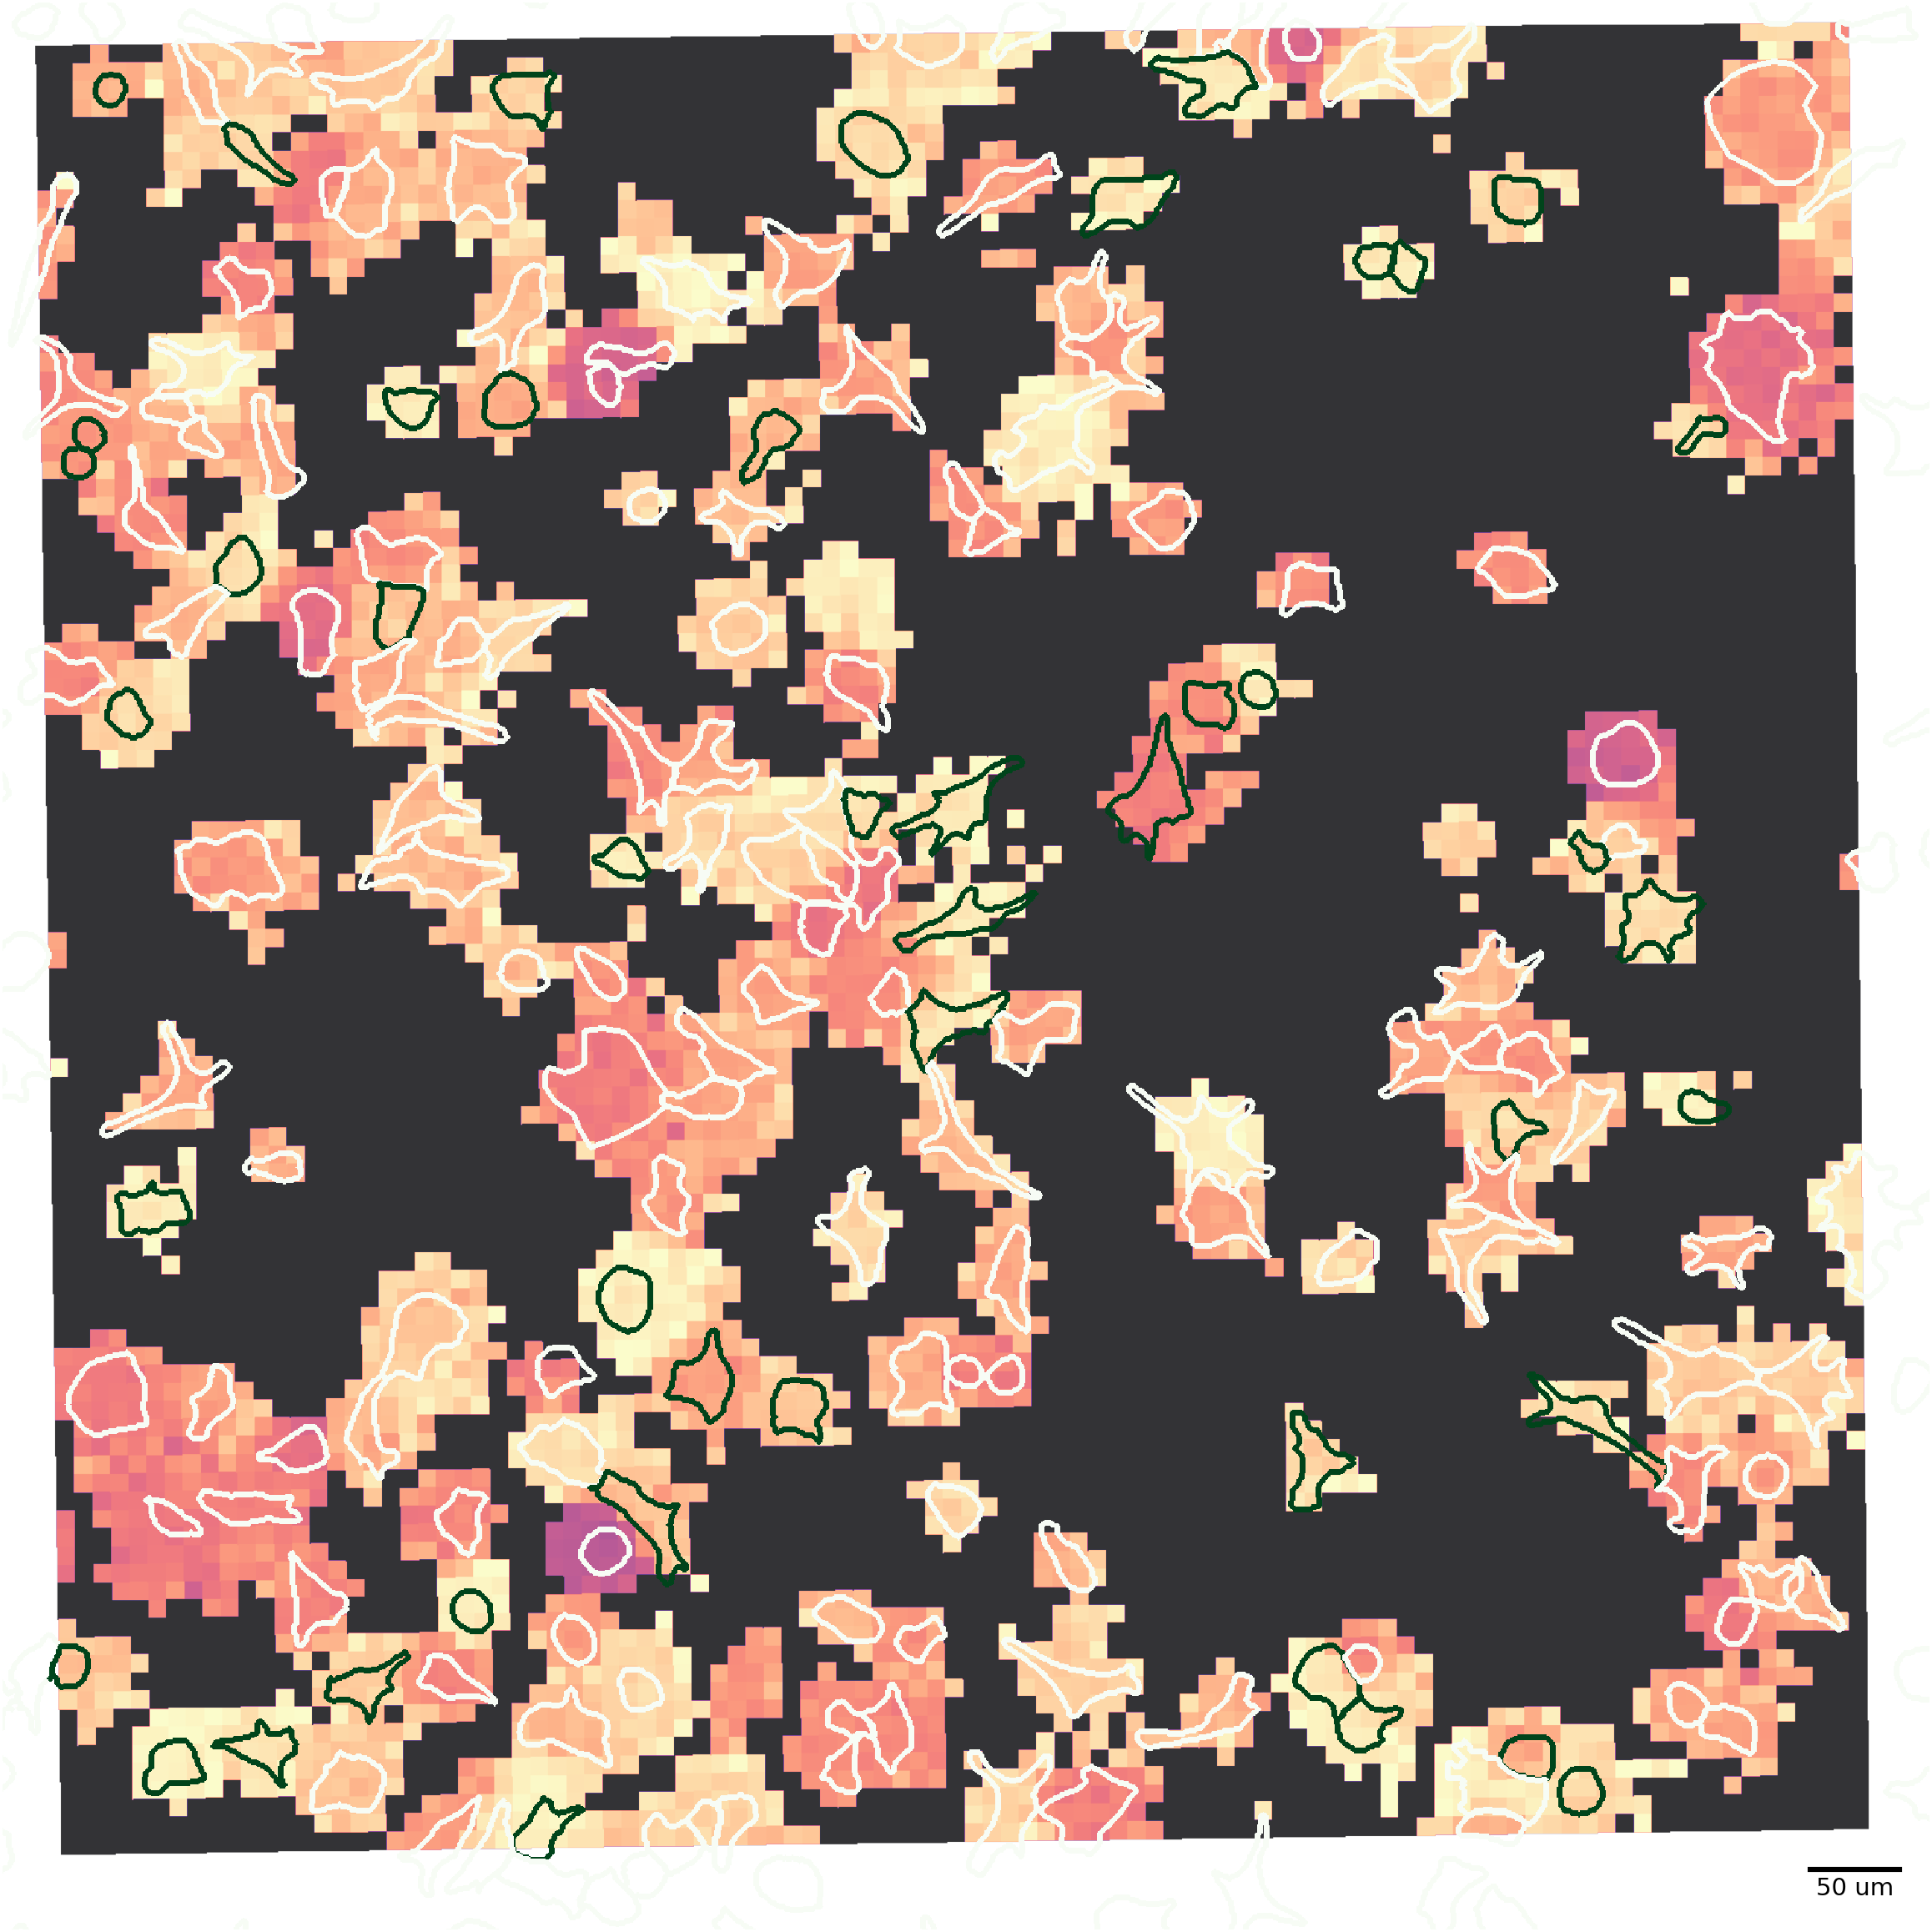

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
roi = np.s_[250:1900, 250:1900]


# plt.imshow(mapped_cells_p[roi], alpha=0.5 * (mapped_cells_p[roi] > 0).astype(float), interpolation="nearest", cmap="magma")

plt.imshow(mapped_ams_ion[roi], alpha=0.8 * (am_masks_squares[roi]>0).astype(float))
plt.imshow(mapped_cells_gfp_class[roi], alpha=(cell_contours[roi] > 0).astype(float), interpolation="nearest", cmap="Greens")
# plt.imshow(mapped_cells_gfp_class[roi], alpha=(mapped_cells_gfp[roi] > 0).astype(float), interpolation="nearest", cmap="Greens")

scalebar = AnchoredSizeBar(ax.transData,
                           78, '50 um', 'lower right', 
                           pad=0.2,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           borderpad=1
                           )

ax.add_artist(scalebar)


plt.axis("off")
plt.savefig(plots_path / "panel_e.png")
plt.savefig(plots_path / "panel_e.svg")
plt.show()

/tmp/ipykernel_29100/4037883730.py:4: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=Normalize(0, 1), cmap="magma"))


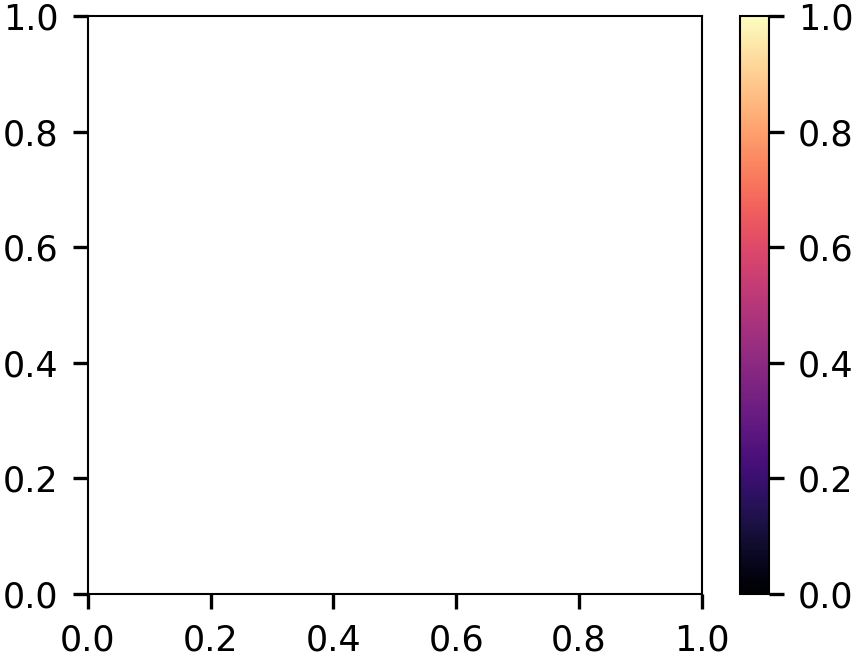

In [20]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

plt.colorbar(cm.ScalarMappable(norm=Normalize(0, 1), cmap="magma"))

plt.savefig(plots_path / "panel_d_scalebar.png")
plt.savefig(plots_path / "panel_d_scalebar.svg")
plt.show()

## Panel f

### Set paths

In [21]:
# Input
data_dir = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") 
anndata_dir = data_dir / "anndata"
adata_path = anndata_dir / "aclykd_adata_concat_fit.h5ad"
adata_am_path =anndata_dir / "aclykd_adata_am_concat.h5ad"
spacem_dir = data_dir / "slide1" / "spacem_data" / "W1"

# Output
plots_path = Path(r"/media/buglakova/Extreme SSD/isotope_tracing_backup/data/share/20220411_AB_DKFZACLYac") / "figure_images" / "fig_04"
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load anndata

In [22]:
adata = sc.read_h5ad(adata_path)
adata_am = sc.read_h5ad(adata_am_path)

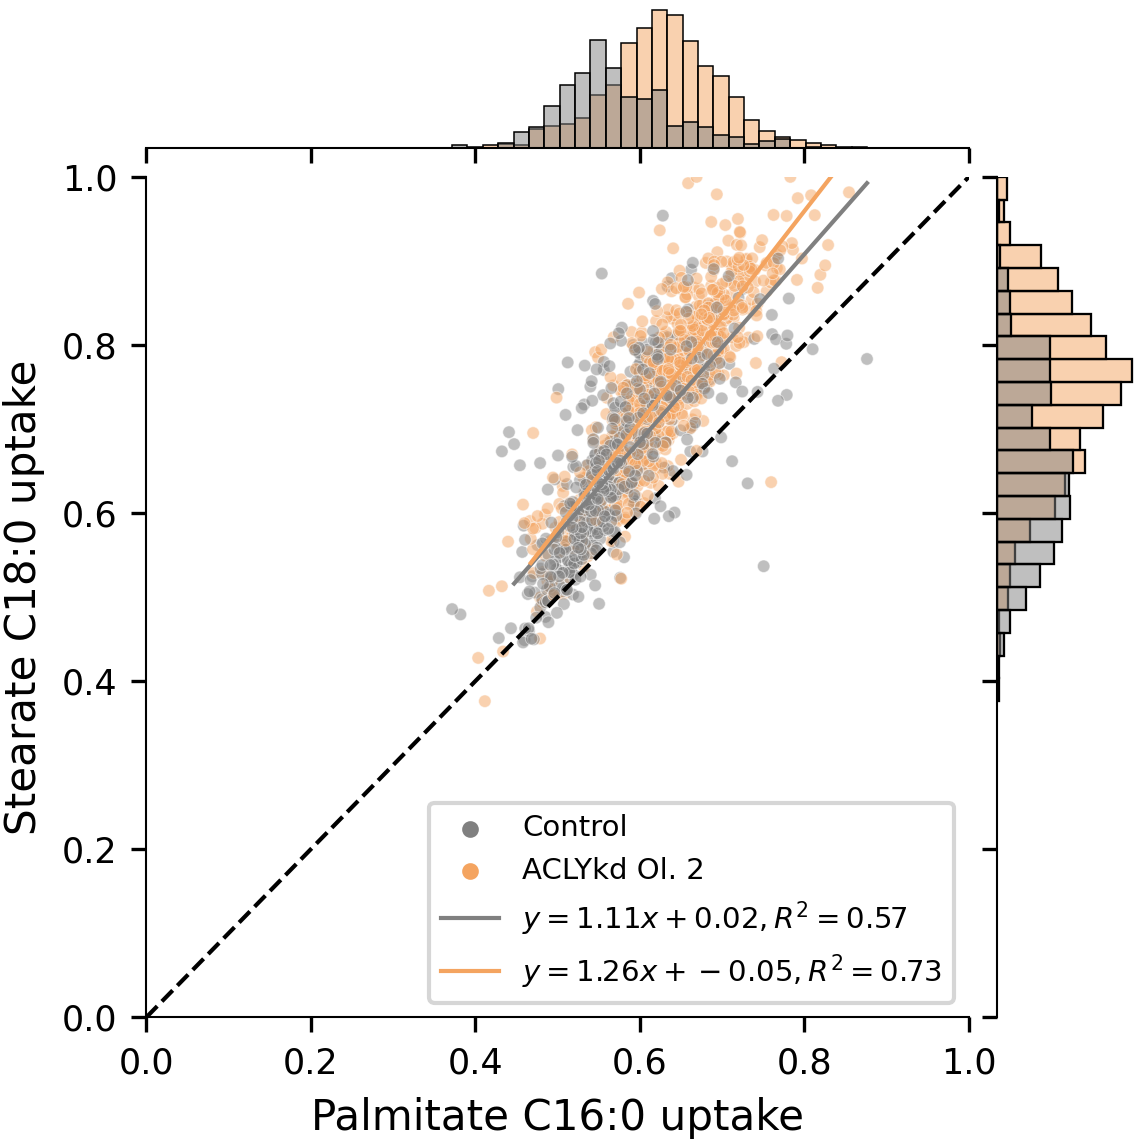

In [23]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & (adata.obs.condition != 'ACLY Ol.1')].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H36O2-H_uptake'

condition_names = df["condition"].replace({'Wildtype': "Control", 'ACLY Ol.1': "ACLYkd Ol. 1", 'ACLYkd Ol.2': "ACLYkd Ol. 2"})

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue=condition_names, ylim=(0, 1), xlim=(0, 1), palette=["grey", "sandybrown"], hue_order=['Control',  'ACLYkd Ol. 2'], height=4)
p.plot_joint(sns.scatterplot, alpha=0.5)
p.plot_marginals(sns.histplot)
p.plot_joint(plot_unity)
# p.refline(x=adata.obs[adata.obs.gfp_class == 0].log_gfp.max(), label="GFP intensity threshold", color="green")
plt.ylabel("Stearate C18:0 uptake")
plt.xlabel("Palmitate C16:0 uptake")

for color, cond in zip(["grey", "sandybrown"], ['Wildtype',  'ACLYkd Ol.2']):
    df_cond = df[df["condition"] == cond]

    regr = linear_model.LinearRegression(positive=True)
    x = df_cond[x_col].to_numpy()
    y = df_cond[y_col].to_numpy()
    y = y[x > np.quantile(x, 0.01)].reshape(-1, 1)
    x = x[x > np.quantile(x, 0.01)].reshape(-1, 1)
    regr.fit(x, y)
    x_plot = np.linspace(x.min(), x.max(), 10).reshape(-1, 1)
    line_equation = fr"$y = {regr.coef_[0][0]:.2f} x + {regr.intercept_[0]:.2f}, R^2 = {regr.score(x, y):.2f}$"
    p.ax_joint.plot(x_plot, regr.predict(x_plot), c=color, label=line_equation)
plt.legend()


plt.savefig(plots_path / "panel_e_1_palmitate_stearate.png")
plt.savefig(plots_path / "panel_e_1_palmitate_stearate.svg")

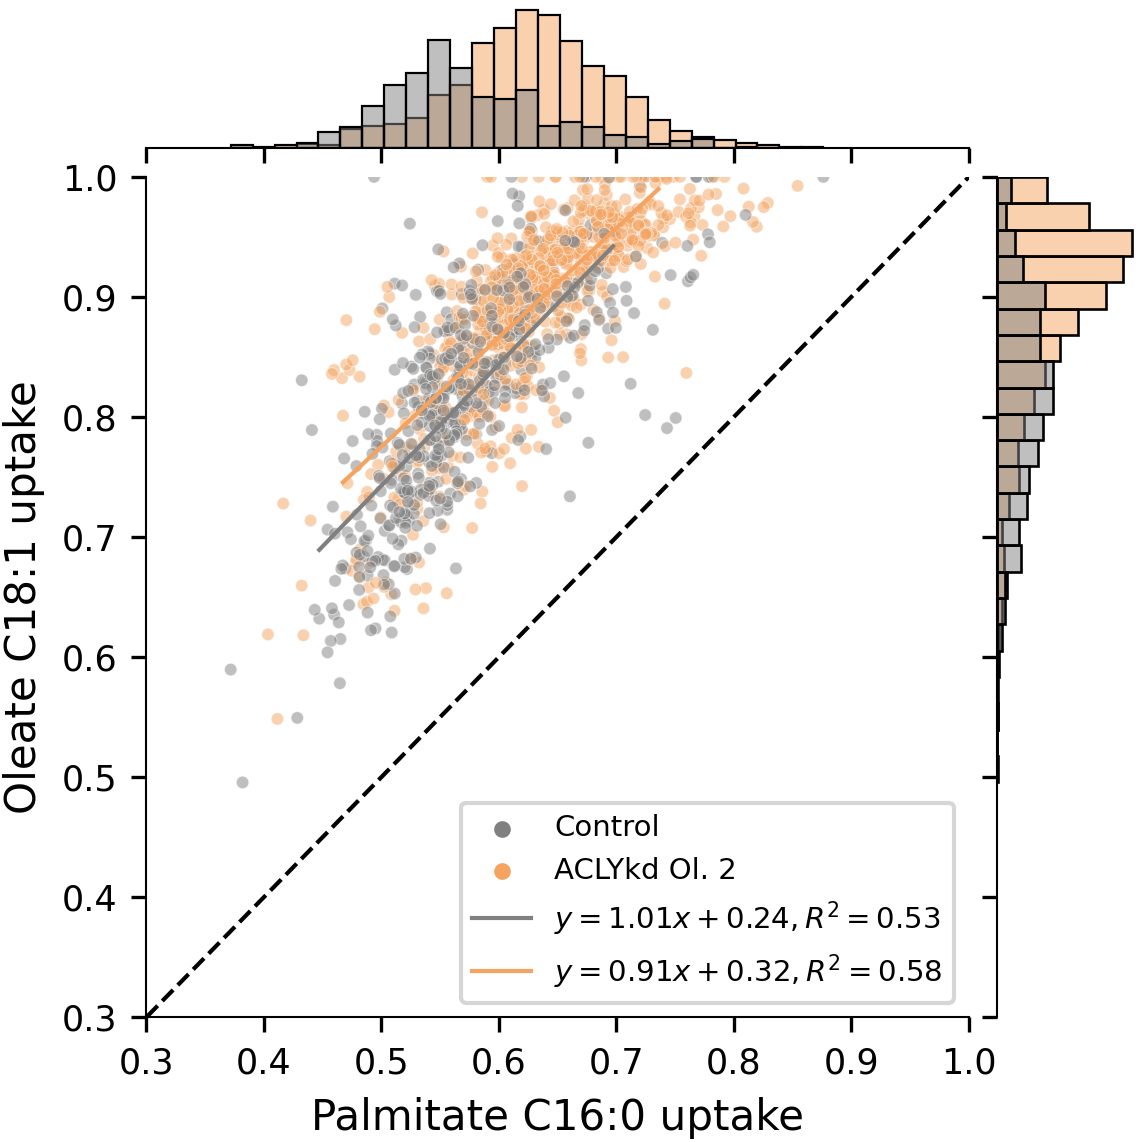

In [24]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & (adata.obs.condition != 'ACLY Ol.1')].obs
x_col = 'C16H32O2-H_uptake'
y_col = 'C18H34O2-H_uptake'

condition_names = df["condition"].replace({'Wildtype': "Control", 'ACLY Ol.1': "ACLYkd Ol. 1", 'ACLYkd Ol.2': "ACLYkd Ol. 2"})

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue=condition_names, ylim=(0.3, 1), xlim=(0.3, 1), palette=["grey", "sandybrown"], hue_order=['Control',  'ACLYkd Ol. 2'], height=4)
p.plot_joint(sns.scatterplot, alpha=0.5)
p.plot_marginals(sns.histplot)
p.plot_joint(plot_unity)
# p.refline(x=adata.obs[adata.obs.gfp_class == 0].log_gfp.max(), label="GFP intensity threshold", color="green")
plt.ylabel("Oleate C18:1 uptake")
plt.xlabel("Palmitate C16:0 uptake")

for color, cond in zip(["grey", "sandybrown"], ['Wildtype',  'ACLYkd Ol.2']):
    df_cond = df[df["condition"] == cond]

    regr = linear_model.LinearRegression(positive=True)
    x = df_cond[x_col].to_numpy()
    y = df_cond[y_col].to_numpy()
    
    y = y[(x > np.quantile(x, 0.01)) & (x < np.quantile(x, 0.95))].reshape(-1, 1)
    x = x[(x > np.quantile(x, 0.01)) & (x < np.quantile(x, 0.95))].reshape(-1, 1)
    
    
    x = x[(y > np.quantile(y, 0.01)) & (y < np.quantile(y, 0.95))].reshape(-1, 1)
    y = y[(y > np.quantile(y, 0.01)) & (y < np.quantile(y, 0.95))].reshape(-1, 1)
    
    regr.fit(x, y)
    x_plot = np.linspace(x.min(), x.max(), 10).reshape(-1, 1)
    line_equation = fr"$y = {regr.coef_[0][0]:.2f} x + {regr.intercept_[0]:.2f}, R^2 = {regr.score(x, y):.2f}$"
    p.ax_joint.plot(x_plot, regr.predict(x_plot), c=color, label=line_equation)
    

plt.legend()

plt.savefig(plots_path / "panel_e_2_palmitate_oleate.png")
plt.savefig(plots_path / "panel_e_2_palmitate_oleate.svg")

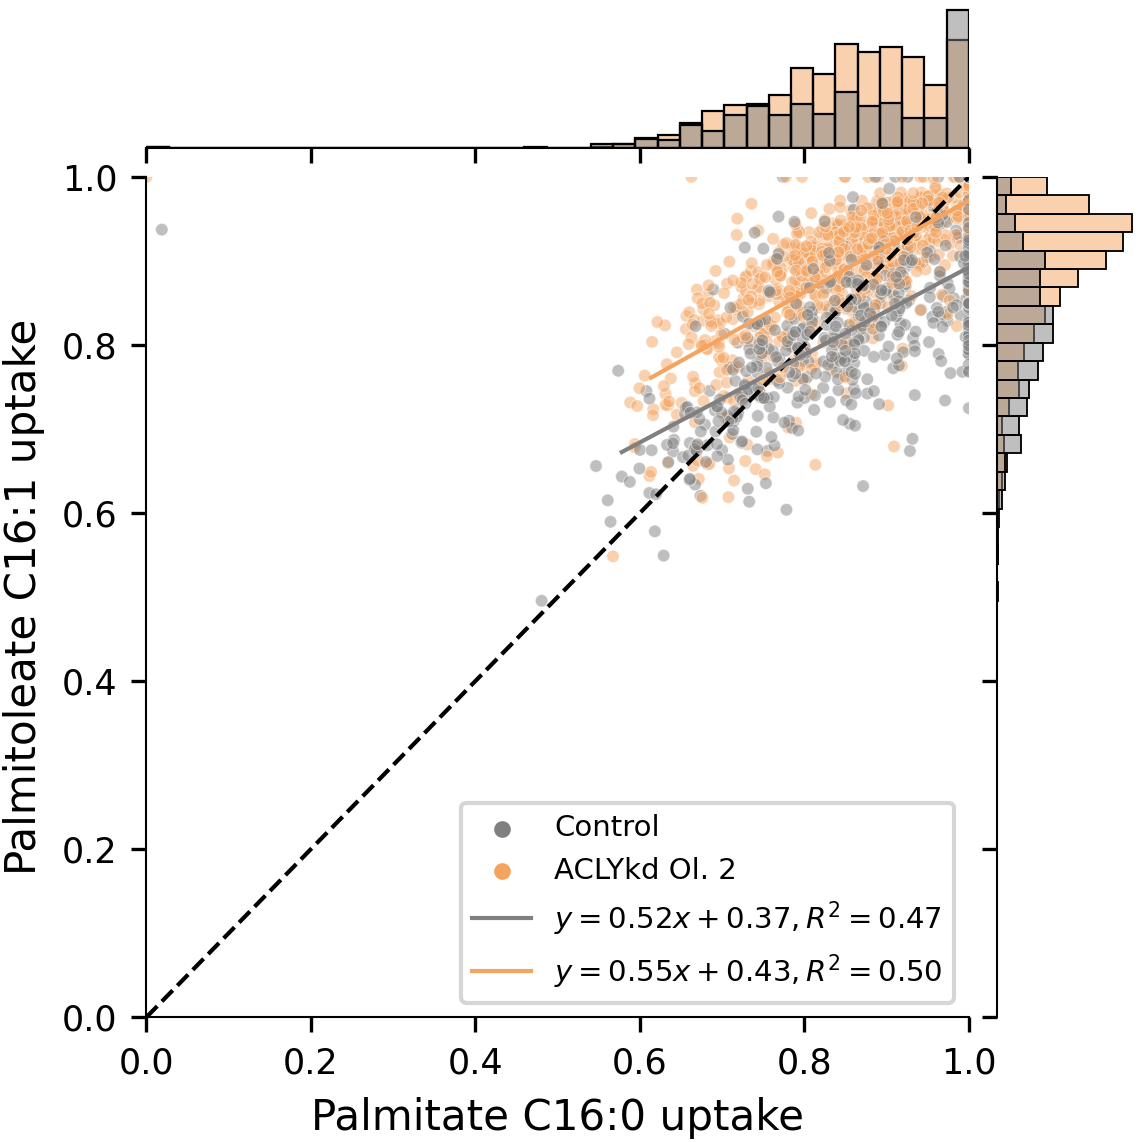

In [25]:
df = adata[(adata.obs.mixture == 0) & (adata.obs.growthConditions == "Labeled") & (adata.obs.condition != 'ACLY Ol.1')].obs
x_col = 'C16H30O2-H_uptake'
y_col = 'C18H34O2-H_uptake'

condition_names = df["condition"].replace({'Wildtype': "Control", 'ACLY Ol.1': "ACLYkd Ol. 1", 'ACLYkd Ol.2': "ACLYkd Ol. 2"})

p = sns.JointGrid(data=df, y=y_col, x=x_col, hue=condition_names, ylim=(0, 1), xlim=(0, 1), palette=["grey", "sandybrown"], hue_order=['Control',  'ACLYkd Ol. 2'], height=4)
p.plot_joint(sns.scatterplot, alpha=0.5)
p.plot_marginals(sns.histplot)
p.plot_joint(plot_unity)
# p.refline(x=adata.obs[adata.obs.gfp_class == 0].log_gfp.max(), label="GFP intensity threshold", color="green")
plt.ylabel("Palmitoleate C16:1 uptake")
plt.xlabel("Palmitate C16:0 uptake")
for color, cond in zip(["grey", "sandybrown"], ['Wildtype',  'ACLYkd Ol.2']):
    df_cond = df[df["condition"] == cond]

    regr = linear_model.LinearRegression(positive=True)
    x = df_cond[x_col].to_numpy()
    y = df_cond[y_col].to_numpy()
    y = y[x > np.quantile(x, 0.01)].reshape(-1, 1)
    x = x[x > np.quantile(x, 0.01)].reshape(-1, 1)
    regr.fit(x, y)
    x_plot = np.linspace(x.min(), x.max(), 10).reshape(-1, 1)
    line_equation = fr"$y = {regr.coef_[0][0]:.2f} x + {regr.intercept_[0]:.2f}, R^2 = {regr.score(x, y):.2f}$"
    p.ax_joint.plot(x_plot, regr.predict(x_plot), c=color, label=line_equation)
plt.legend()

plt.savefig(plots_path / "panel_e_3_palmitate_palmitoleate.png")
plt.savefig(plots_path / "panel_e_3_palmitate_palmitoleate.svg")